EXPLORING CRIME RATES BY RACE IN THE UNITED STATES

INTRODUCTION

The incarcerated population of the US has seen a dramatic increase from the mid-1970s (Weidner & Schultz, 2019). However, there is a disparity between incarceration rates by race; for example, Black and Hispanic individuals are incarcerated at six and three times the rate of Whites, respectively, in state and federal prisons. As a result, we are interested in investigating the relationship between different communities and their crime rates, focussing specifically on violent crime rates. From that, we can look closer into the demographic of each community and further examine the relationships between crime and race. The big question to be answered is therefore, “Can the violent crime rate in a community be predicted based on the racial characteristics of the community?”.

In order to answer this question, the "Communities and Crimes" dataset from the UCI Machine Learning Repository was chosen, which contains various socio-economic, law enforcement and crime statistics from the 1990 US Census, 1990 US LEMAS survey and 1995 FBI UCR (Dua & Graff, 2019). The data is unnormalized and observations are listed at the community level, which includes cities, townships, and boroughs. The scope of the variables also needs to be addressed, due to the multitude of crime types that exist. For this dataset, violent crimes consist of murder, rape, robbery, and assault per 100k population.

METHODOLOGY

We aim to predict the violent crime rate  by race, hence our target and predictor variables will be the former and the latter, respectively. Due to the numerical variables, regression is appropriate for this question. A scatter plot will be used to visualize the relationship between the two chosen variables. The predictor variable will be placed on the x-axis and the target variable will be placed on the y-axis. Regression can then be performed to predict the y value in relation to a given value of x. 

PRELIMINARY EXPLORATORY DATA ANALYSIS

We begin by loading in the necessary packages for data wrangling and visualization, and setting the seed for our analysis. We see that the

In [1]:
# Loads packages
library(tidyverse)
library(repr)
library(tidymodels)

# Set seed
set.seed(100)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Next, we need to read in the data, using the column names from the attribute information for the dataset (Dua & Graff, 2019).

In [2]:
# Vector for column names
colnames <- c("communityname", "state", "countyCode", "communityCode", "fold", "population", "householdsize", "racepctblack",
              "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban",
              "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire",
                "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap",
                "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy",
                "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr",
                "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par",
                "PctWorkMomYoungKids", "PctWorkMom", "NumKidsBornNeverMar", "PctKidsBornNeverMar", "NumImmig", "PctImmigRecent",
                "PctImmigRec5", "PctImmigRec8",  "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
                "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous",
                "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup",
                "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart",
                "OwnOccMedVal", "OwnOccHiQuart", "OwnOccQrange", "RentLowQ", "RentMedian", "RentHighQ", "RentQrange", "MedRent",
                "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn",
                "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop",
                "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop",
                "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor",
                "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars",
                "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "murdPerPop",
                "rapes", "rapesPerPop", "robberies", "robbbPerPop", "assaults", "assaultPerPop", "burglaries", "burglPerPop",
                "larcenies", "larcPerPop", "autoTheft", "autoTheftPerPop", "arsons", "arsonsPerPop", "ViolentCrimesPerPop", "nonViolPerPop")

In [3]:
# Reads data in and specifies column names
crime <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt",
                  col_names = colnames)
                                
head(crime)

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 2215 Columns: 147
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (42): communityname, state, countyCode, communityCode, LemasSwornFT, Le...
dbl (105): fold, population, householdsize, racepctblack, racePctWhite, race...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,X147
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,⋯,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,⋯,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,⋯,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,⋯,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,⋯,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
Springfieldcity,MO,?,?,1,140494,2.45,2.51,95.65,0.90,⋯,2094,1386.46,7690,5091.64,454,300.6,134,88.72,442.95,6867.42


**Table 1**

As our analysis will only consist of the violent crime rate per 100k, the columns for the individual crimes can be ignored in favour of the ViolentCrimesPerPop column. We also will select the population percentages by race, as these will be our predictor variables. Additionally, for the sake of readability, the names of the communities and their states will be included.

In [4]:
crime_selected <- crime |>
                    select(communityname, state, population, racepctblack:racePctHisp, ViolentCrimesPerPop)
head(crime_selected)

communityname,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BerkeleyHeightstownship,NJ,11980,1.37,91.78,6.50,1.88,16.41
Marpletownship,PA,23123,0.80,95.57,3.44,0.85,4.25
Tigardcity,OR,29344,0.74,94.33,3.43,2.35,60.87
Gloversvillecity,NY,16656,1.70,97.35,0.50,0.70,?
Bemidjicity,MN,11245,0.53,89.16,1.17,0.52,40.05
Springfieldcity,MO,140494,2.51,95.65,0.90,0.95,88.72


| Column Name | Description |
| :- | :- | 
| communityname | the name of the community in which the data is obtained from
| state | the state in which the community is located in
| population | the population of the community
| racepctblack | the percentage of the population that racially identifies as Black
| racePctWhite | the percentage of the population that racially identifies as White
| racePctAsian | the percentage of the population that racially identifies as Asian
| racePctHisp | the percentage of the population that racially identifies as Hispanic
| ViolentCrimesPerPop | the number of violent crimes per 100k population

The ViolentCrimesPerPop column are of the character type—it needs to be converted to the double type as the values contain decimals. After this is performed, we can then proceed to make the training and testing datasets.

In [5]:
crime_w_capita <- crime_selected |>
                mutate(ViolentCrimesPerPop = as.numeric(ViolentCrimesPerPop))

head(crime_w_capita)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


communityname,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BerkeleyHeightstownship,NJ,11980,1.37,91.78,6.50,1.88,16.41
Marpletownship,PA,23123,0.80,95.57,3.44,0.85,4.25
Tigardcity,OR,29344,0.74,94.33,3.43,2.35,60.87
Gloversvillecity,NY,16656,1.70,97.35,0.50,0.70,NA
Bemidjicity,MN,11245,0.53,89.16,1.17,0.52,40.05
Springfieldcity,MO,140494,2.51,95.65,0.90,0.95,88.72


To perform regression, the dataset needs to be split into training and testing datasets. We will set aside 75% of our data to be our training dataset, and specify the ViolentCrimesPerPop column to be our target variable.

In [6]:
crime_split <- crime_w_capita |>
                initial_split(prop = 0.75, strata = ViolentCrimesPerPop)

crime_training <- training(crime_split)
crime_testing <- testing(crime_split)

To obtain a general overview of the training dataset and help build the model, summary statistics will be useful. We will exclude observations with missing values, thus, finding the number of observations with missing values will help us ensure that there is a sufficient quantity of data to train the model. It would also be helpful to find the mean and range of the racial percentages and ViolentCrimesPerPop column, as an uneven distribution of data will affect the mean of the nearest k neighbours, and therefore the regression results. It may also be interesting to determine the count of community types; more larger communities lack a majority racial group compared to smaller communities (Farrell & Lee, 2016) while communities with more visitors tend to have higher crime rates (Dua & Graff, 2019) — this will be considered in the evaluation.

To begin, we apply the filter_all function to subset all rows with missing values, and obtain the number of rows.

In [7]:
cols <- colnames(crime_training)

missing_values <- crime_training |>
                    filter_all(any_vars(is.na(.))) |>
                    summarize(missing = n())
missing_values

missing
<int>
69


In order to calculate the mean and range, we filter out rows with missing values, and apply the map_dfr function to obtain a new dataframe with the calculated means, maximums, and minimums.

In [8]:
crime_data <- crime_training |>
                filter_all(all_vars(!is.na(.)))

head(crime_data)

variable_mean <- crime_data |>
                    select(racepctblack:racePctHisp, ViolentCrimesPerPop) |>
                    map_dfr(mean, na.rm = TRUE) |>
                    rename(racepctblack__mean = racepctblack,
                           racePctWhite__mean = racePctWhite,
                           racePctAsian__mean = racePctAsian,
                           racePctHisp__mean = racePctHisp,
                           ViolentCrimesPerPop__mean = ViolentCrimesPerPop)

variable_mean

variable_max <- crime_data |>
                    select(racepctblack:racePctHisp, ViolentCrimesPerPop) |>
                    map_dfr(max, na.rm = TRUE) |>
                    rename(racepctblack__max = racepctblack,
                           racePctWhite__max = racePctWhite,
                           racePctAsian__max = racePctAsian,
                           racePctHisp__max = racePctHisp,
                           ViolentCrimesPerPop__max = ViolentCrimesPerPop)

variable_max

variable_min <- crime_data |>
                    select(racepctblack:racePctHisp, ViolentCrimesPerPop) |>
                    map_dfr(min, na.rm = TRUE) |>
                    rename(racepctblack__min = racepctblack,
                           racePctWhite__min = racePctWhite,
                           racePctAsian__min = racePctAsian,
                           racePctHisp__min = racePctHisp,
                           ViolentCrimesPerPop__min = ViolentCrimesPerPop)
variable_min

communityname,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Marpletownship,PA,23123,0.80,95.57,3.44,0.85,4.25
NewUlmcity,MN,13132,0.06,99.21,0.47,0.59,7.31
Bellairecity,TX,13842,0.41,94.65,1.98,7.95,6.69
WestMemphiscity,AR,28259,42.15,56.94,0.52,0.50,0.00
Gorhamtown,ME,11856,0.37,98.84,0.40,0.45,0.00
RockSpringscity,WY,19050,1.17,94.31,0.96,7.46,0.00


racepctblack__mean,racePctWhite__mean,racePctAsian__mean,racePctHisp__mean,ViolentCrimesPerPop__mean
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.089994,83.89442,2.754563,8.374758,31.8858


racepctblack__max,racePctWhite__max,racePctAsian__max,racePctHisp__max,ViolentCrimesPerPop__max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
96.67,99.63,57.46,95.29,436.37


racepctblack__min,racePctWhite__min,racePctAsian__min,racePctHisp__min,ViolentCrimesPerPop__min
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2.68,0.05,0.12,0


| Column Name | Description |
| :- | :- | 
| racepctblack__mean | the mean of the percentage of the population that racially identifies as Black
| racePctWhite__mean | the mean of the percentage of the population that racially identifies as White
| racePctAsian__mean | the mean of the percentage of the population that racially identifies as Asian
| racePctHisp__mean | the mean of the percentage of the population that racially identifies as Hispanic
| ViolentCrimesPerPop__mean | the mean of the amount of violent crime per population
| racepctblack__max | the maximum of the percentage of the population that racially identifies as Black
| racePctWhite__max | the maximum of the percentage of the population that racially identifies as White
| racePctAsian__max | the maximum of the percentage of the population that racially identifies as Asian
| racePctHisp__max | the maximum of the percentage of the population that racially identifies as Hispanic
| ViolentCrimesPerPop__max | the maximum of the amount of violent crime per population
| racepctblack__min | the minimum of the percentage of the population that racially identifies as Black
| racePctWhite__min | the minimum of the percentage of the population that racially identifies as White
| racePctAsian__min | the minimum of the percentage of the population that racially identifies as Asian
| racePctHisp__min | the minimum of the percentage of the population that racially identifies as Hispanic
| ViolentCrimesPerPop__min | the minimum of the amount of violent crime per population

Upon inspecting the crime_data table, the community names contain one of: borough, town, township, and city. Hence, we can use the str_detect function to filter for rows matching the respective characters, and apply the summarize function to the result to obtain the count.

In [9]:
borough_count <- crime_data |>
                filter(str_detect(communityname, "borough")) |>
                summarize(borough_count = n())

borough_count

town_count <- crime_data |>
                filter(str_detect(communityname, "town") & !str_detect(communityname, "township")) |>
                summarize(town_count = n())

town_count

township_count <- crime_data |>
                filter(str_detect(communityname, "township")) |>
                summarize(township_count = n())

township_count

city_count <- crime_data |>
                filter(str_detect(communityname, "city")) |>
                summarize(city_count = n())

city_count

borough_count
<int>
59


town_count
<int>
208


township_count
<int>
145


city_count
<int>
1170


In [10]:
crime_summary_1 <- tibble(variable_mean, variable_max, variable_min) |>
                pivot_longer(cols = everything(),
                             names_to = "metric",
                             values_to = "value") |>
                separate(col = metric,
                         into = c("variable", "metric"),
                         sep = "__") |>
                pivot_wider(names_from = metric,
                            values_from = value)
                

crime_summary_1

crime_summary_2 <- tibble(city_count, township_count, town_count, borough_count)

crime_summary_2

missing_values

variable,mean,max,min
<chr>,<dbl>,<dbl>,<dbl>
racepctblack,9.089994,96.67,0.00
racePctWhite,83.894425,99.63,2.68
racePctAsian,2.754563,57.46,0.05
racePctHisp,8.374758,95.29,0.12
ViolentCrimesPerPop,31.885795,436.37,0.00


city_count,township_count,town_count,borough_count
<int>,<int>,<int>,<int>
1170,145,208,59


missing
<int>
69


From the above tables, we note that only 156 rows have missing data, meaning that the quantity of data will be sufficient. Whites have the highest mean, while Asians have the lowest mean and smallest range. The range for African Americans, Hispanics and the crime ratio seem to be quite large compared to their relatively low means—visualizations could help determine whether the maximums and minimums are outliers. We note that the sum of the means for race is not 100%, meaning that some of the population may identify as more than one race. However, the difference is small, and can be ignored. Cities also seem to be the dominant community type, which may or may not affect the findings. Lastly, the range of the ViolentCrimesPerPop column seems to be large-again, visualizations may help to determine the spread of the scatter points.

We now visualize the violent crime rate against racial percentages for every race in scatter plots below, beginning with African Americans.

Warning message:
“Removed 69 rows containing missing values (geom_point).”


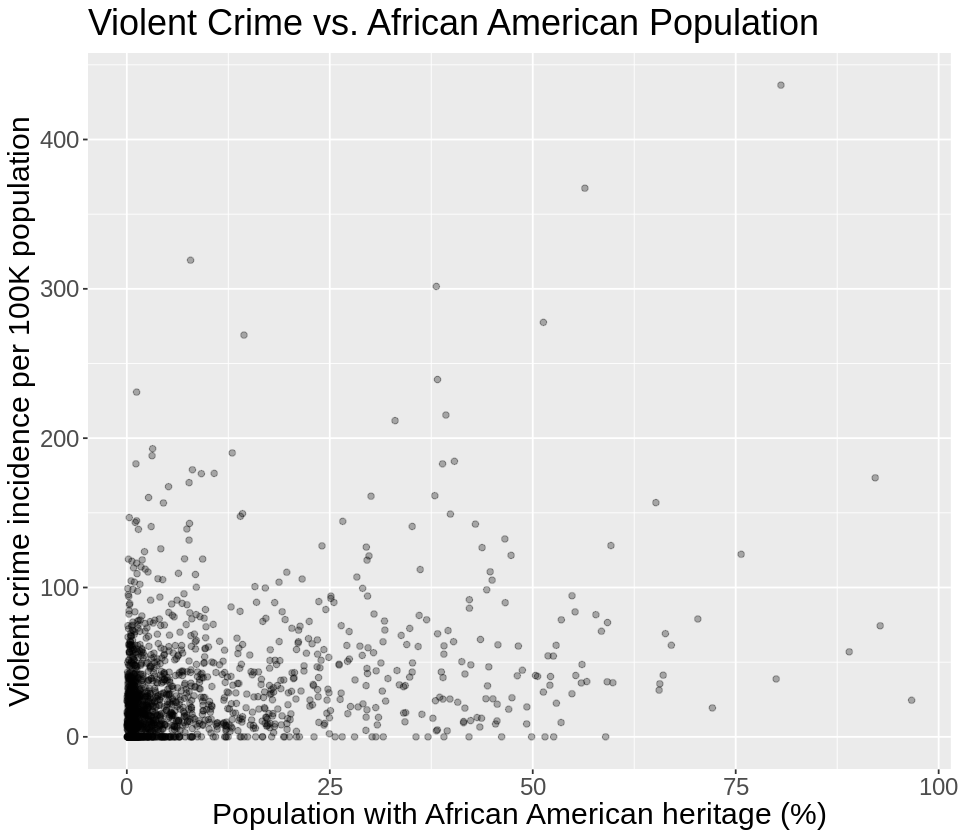

In [11]:
options(repr.plot.width = 8, repr.plot.height = 7)
crime_plot_black <- crime_training |>
                    ggplot(aes(x = racepctblack, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population with African American heritage (%)", y = "Violent crime incidence per 100K population", title = "Violent Crime vs. African American Population") +
                    theme(text = element_text(size = 18))

crime_plot_black

From the above plot, we see that points are clustered at the bottom left. We also note several outliers including the point at about 80% African American heritage, which will affect the tuning of the model. To remedy overplotting, we transform both axes logarithmically.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 69 rows containing missing values (geom_point).”


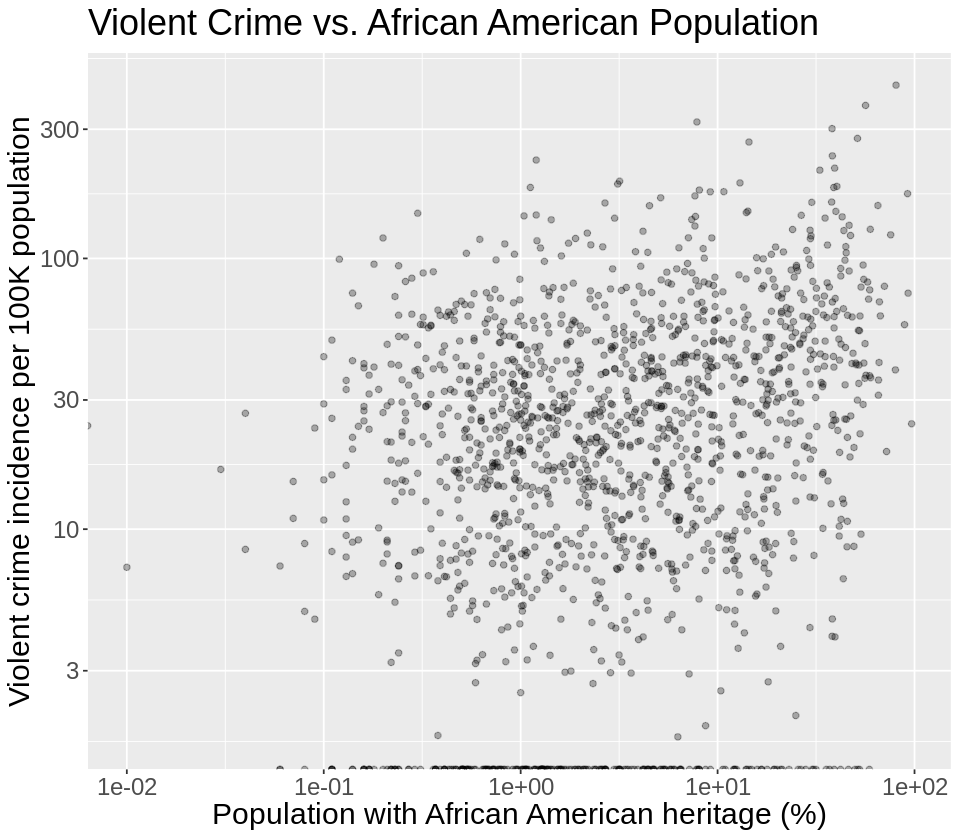

In [12]:
crime_plot_black <- crime_plot_black +
                    scale_x_log10() +
                    scale_y_log10()

crime_plot_black

We see that the relationship between African American heritage and violent crime rate seems to be weakly positive, although with many values of near-zero crime rate.

Next, we plot the violent crime rate against the population identifying as Caucasian.

Warning message:
“Removed 69 rows containing missing values (geom_point).”


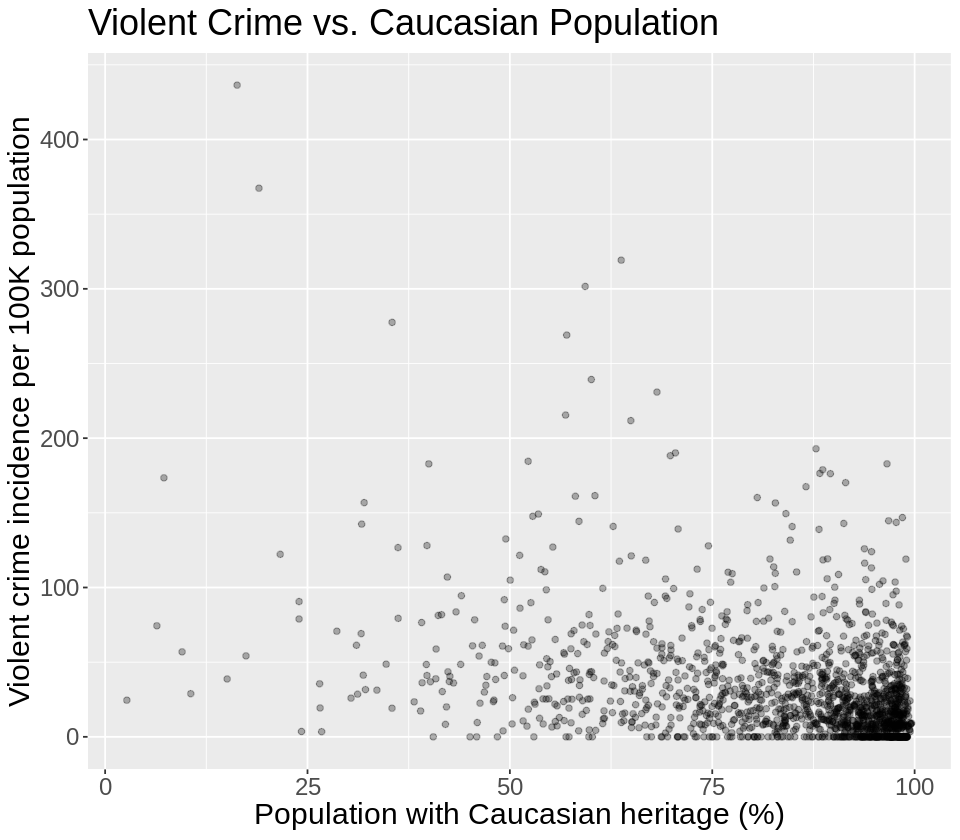

In [13]:
crime_plot_white <- crime_training |>
                    ggplot(aes(x = racePctWhite, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population with Caucasian heritage (%)", y = "Violent crime incidence per 100K population", title = "Violent Crime vs. Caucasian Population") +
                    theme(text = element_text(size = 18))

crime_plot_white

Similarly to the plot for African Americans, the points are clustered at the bottom right, with several potential outliers. We handle overplotting by applying a logarithmic transformation to the y-axis only, as logarithmic scaling on the x-axis would not affect the clustering.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 69 rows containing missing values (geom_point).”


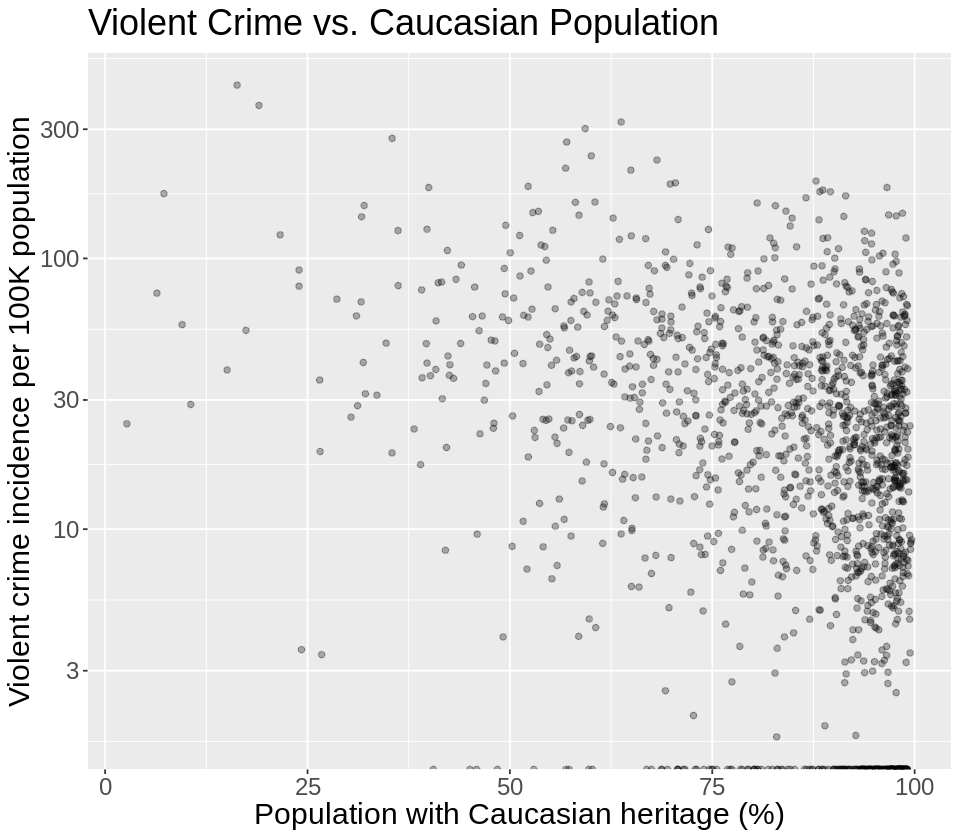

In [14]:
crime_plot_white <- crime_plot_white +
                    scale_x_continuous()+
                    scale_y_log10()

crime_plot_white

We observe that the relationship between Caucasian heritage and violent crime rate may be weakly negative, with many points with high percentages having near-zero violent crime rates.

We now plot the violent crime rate against the population with Asian heritage.

Warning message:
“Removed 69 rows containing missing values (geom_point).”


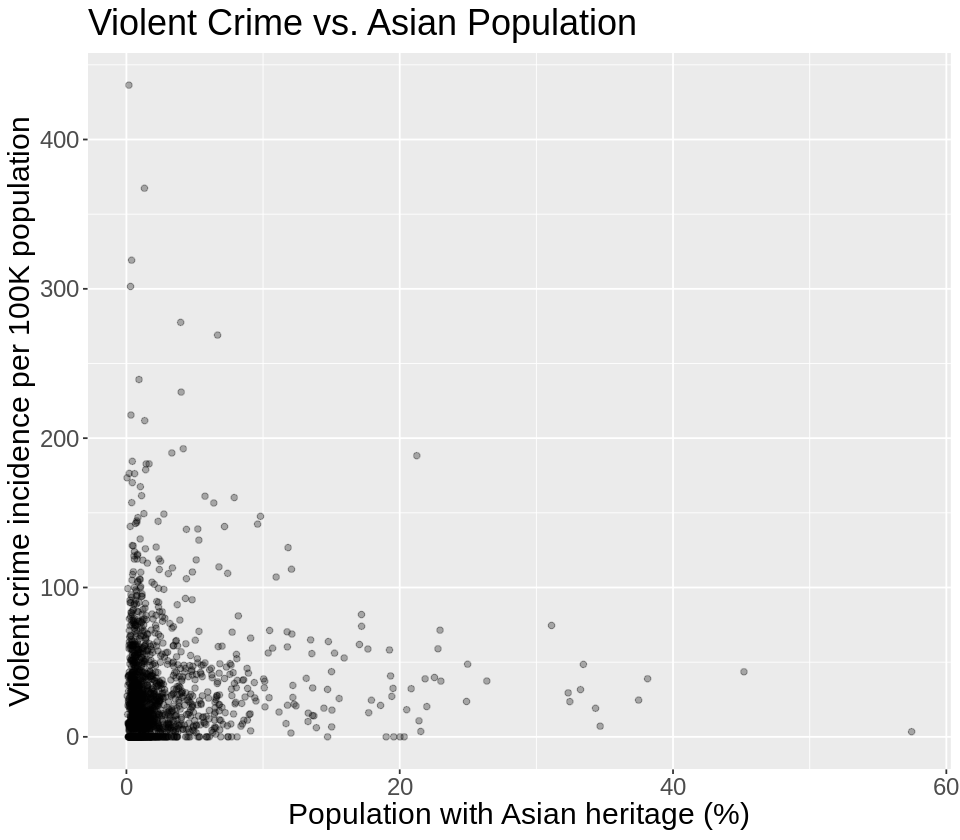

In [15]:
crime_plot_asian <- crime_training |>
                    ggplot(aes(x = racePctAsian, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population with Asian heritage (%)", y = "Violent crime incidence per 100K population", title = "Violent Crime vs. Asian Population") +
                    theme(text = element_text(size = 18))

crime_plot_asian

Excepting several potential outliers, the majority of points are clustered near the bottom left of plot, so again, we apply a logarithmic transformation on both axes.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 69 rows containing missing values (geom_point).”


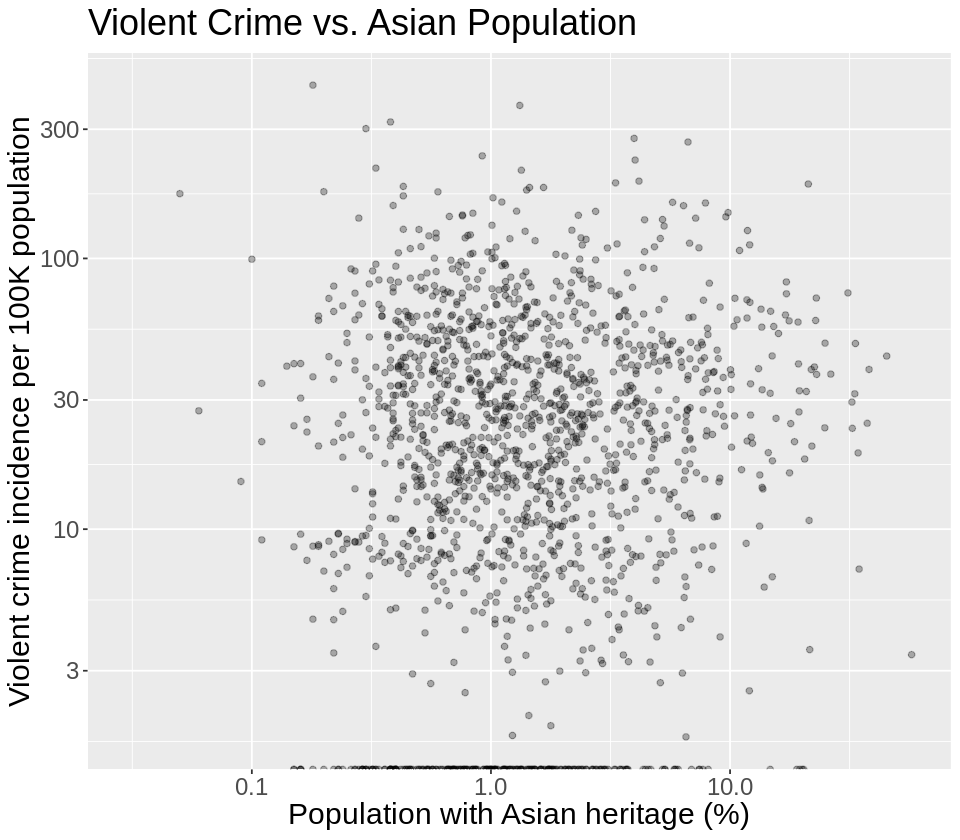

In [16]:
crime_plot_asian <- crime_plot_asian +
                    scale_x_log10() +
                    scale_y_log10()

crime_plot_asian

From the above plot alone, it is difficult to hypothesize a relationship between violent crime rate and Asian heritage. Compared to the other plots, there are many points with near-zero violent crime rate, and the range of the Asian population percentage is much lower.

Lastly, we plot violent crime rates against the Hispanic population.

Warning message:
“Removed 69 rows containing missing values (geom_point).”


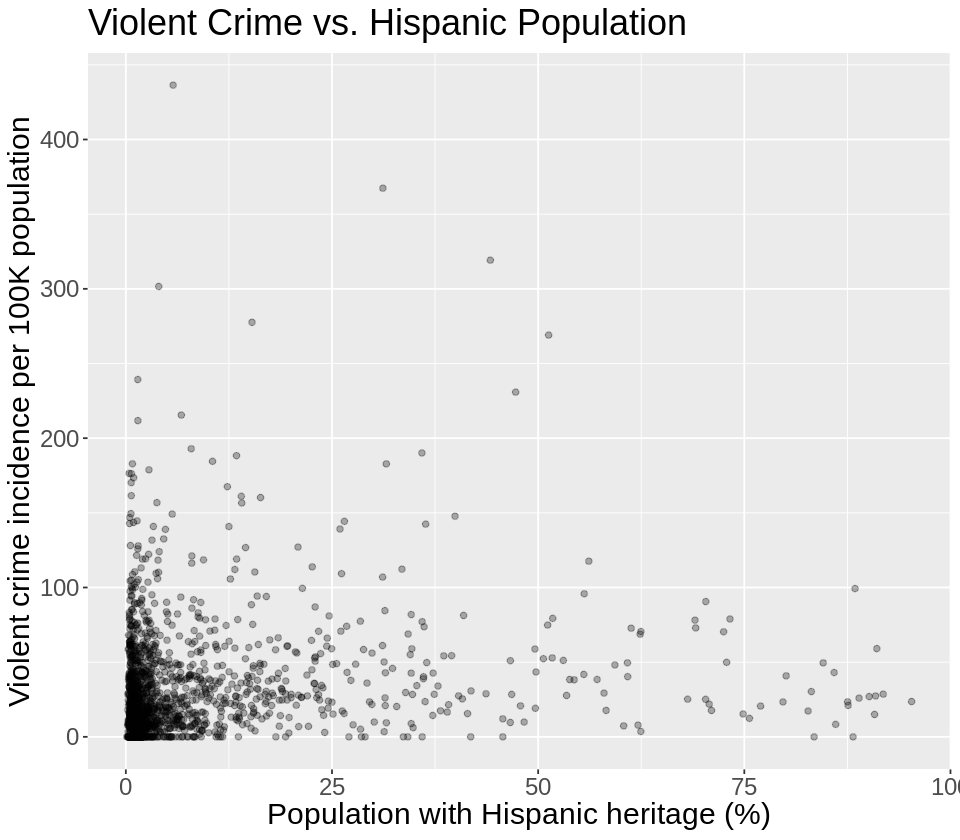

In [17]:
crime_plot_hispanic <- crime_training |>
                    ggplot(aes(x = racePctHisp, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population with Hispanic heritage (%)", y = "Violent crime incidence per 100K population", title = "Violent Crime vs. Hispanic Population") +
                    theme(text = element_text(size = 18))

crime_plot_hispanic

Along with several potential outliers, we again have points clustered at the bottom right, so we use logarithmic scaling on both axes.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 69 rows containing missing values (geom_point).”


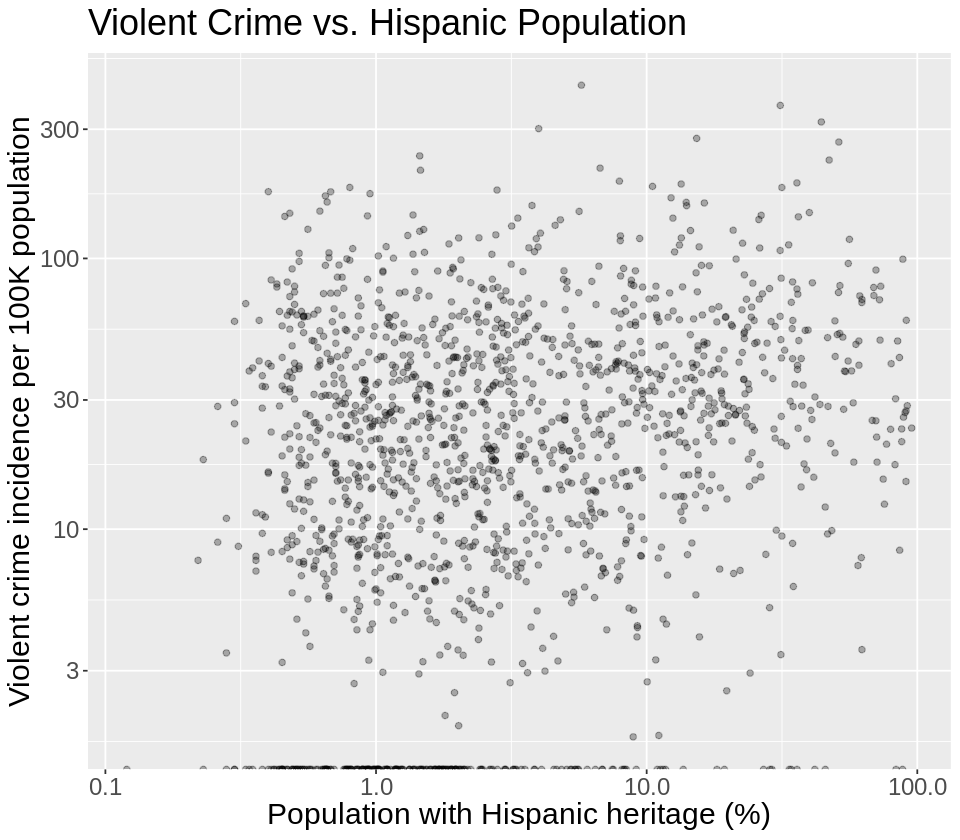

In [18]:
crime_plot_hispanic <- crime_plot_hispanic +
                        scale_x_log10() +
                        scale_y_log10()

crime_plot_hispanic

While not overly clear, there may be a very weak positive relationship between the population with Hispanic heritage and violent crime rate. Similarly to the other plots, we also see many points with near-zero violent crime rates.

The overall relationship seems to be weakly negative for Whites and weakly positive to unclear for the other groups, but we must consider the context behind our variables. Violent crime tends to be quite infrequent, and as seen from Table x, many communities have a population smaller than 100k, meaning that violent crime rates tend to be lower. Hence, a small increase in violent crime rate can be considered significant in the real world.

We begin by tuning our models, using both linear regression and K-nearest neighbours. To maximize the accuracy of our model, we use the model with the lowest RMSE. As we are using regression, no scaling or centering of variables are necessary.

In [19]:
lin_spec <- linear_reg() |>
            set_engine("lm") |>
            set_mode("regression")

black_lin_recipe <- recipe(ViolentCrimesPerPop ~ racepctblack, data = crime_training)

black_lin_fit <- workflow() |>
                add_recipe(black_lin_recipe) |>
                add_model(lin_spec) |>
                fit(data = crime_training)

black_lin_fit

black_lin_rmse <- black_lin_fit |>
            predict(crime_training) |>
            bind_cols(crime_training) |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse")

black_lin_rmse

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  racepctblack  
     24.2112        0.8443  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,36.57789


TODO: comment on rmse estimate and coefficients

For k-nn regression, we need to scale and center our predictor variables. As we are tuning our model, we will use 5 fold cross-validation to choose the optimal value for k. Given that our training set has a large number of observations, our range for k will be from 1 to 50.

In [20]:
options(repr.plot.width = 12, repr.plot.height = 10)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("regression")

black_knn_recipe <- recipe(ViolentCrimesPerPop ~ racepctblack, data = crime_training) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())

vfold <- vfold_cv(crime_training, v = 5, strata = ViolentCrimesPerPop)

kvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

black_knn_metrics <- workflow() |>
                add_recipe(black_knn_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = vfold, grid = kvals) |>
                collect_metrics() |>
                filter(.metric == "rmse") |>
                select(neighbors, mean)

head(black_knn_metrics)
tail(black_knn_metrics)

neighbors,mean
<dbl>,<dbl>
1,53.58710
2,46.01284
3,42.38795
4,40.90153
5,39.88189
6,39.38356


neighbors,mean
<dbl>,<dbl>
45,36.94303
46,36.88273
47,36.89961
48,36.88243
49,36.86428
50,36.82286


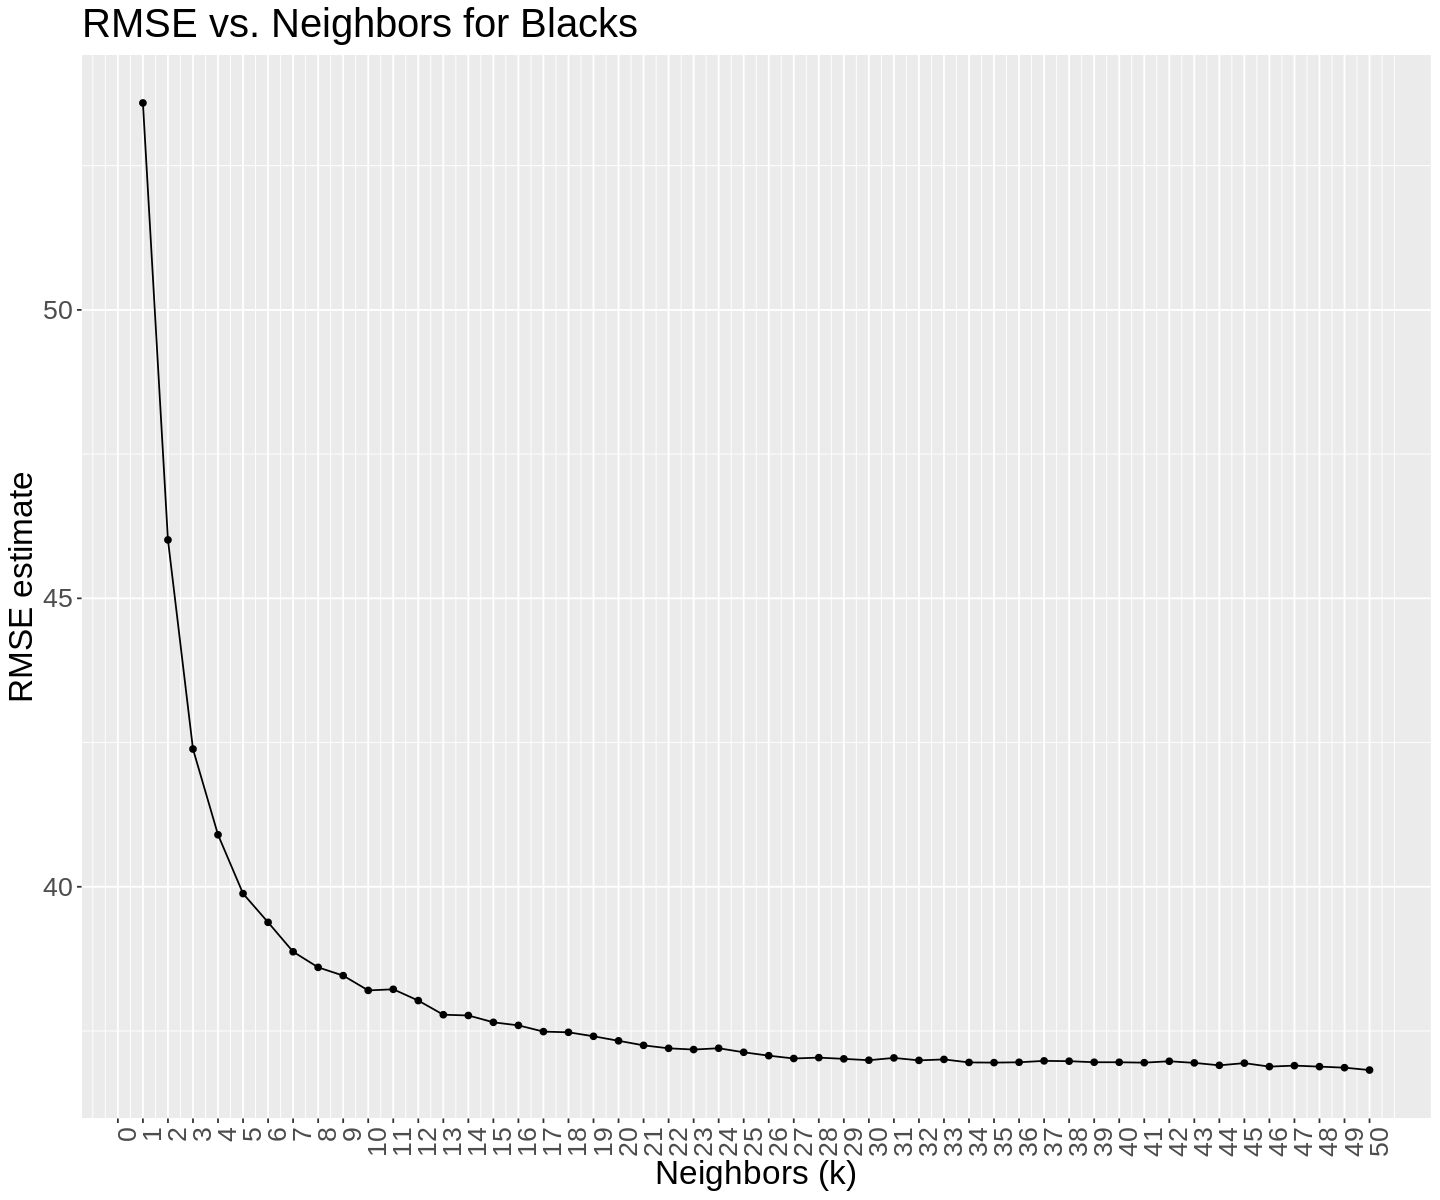

In [21]:
black_k_plot <- black_knn_metrics |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors (k)", y = "RMSE estimate", title = "RMSE vs. Neighbors for Blacks") +
                scale_x_continuous(breaks = seq(0, 50, by = 1)) +
                theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20))

black_k_plot

From the above plot, the RMSE decreases significantly. 

In [22]:
white_lin_recipe <- recipe(ViolentCrimesPerPop ~ racePctWhite, data = crime_training)

white_lin_fit <- workflow() |>
                add_recipe(white_lin_recipe) |>
                add_model(lin_spec) |>
                fit(data = crime_training)

white_lin_fit

white_lin_rmse <- white_lin_fit |>
            predict(crime_training) |>
            bind_cols(crime_training) |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse")

white_lin_rmse

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  racePctWhite  
    100.8983       -0.8226  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,35.9806


In [23]:
white_knn_recipe <- recipe(ViolentCrimesPerPop ~ racePctWhite, data = crime_training) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())

white_knn_metrics <- workflow() |>
                add_recipe(white_knn_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = vfold, grid = kvals) |>
                collect_metrics() |>
                filter(.metric == "rmse") |>
                select(neighbors, mean)

head(white_knn_metrics)
tail(white_knn_metrics)

neighbors,mean
<dbl>,<dbl>
1,50.22605
2,44.73399
3,40.76569
4,39.51806
5,38.94668
6,38.41050


neighbors,mean
<dbl>,<dbl>
45,36.34082
46,36.35237
47,36.35955
48,36.35294
49,36.40329
50,36.39486


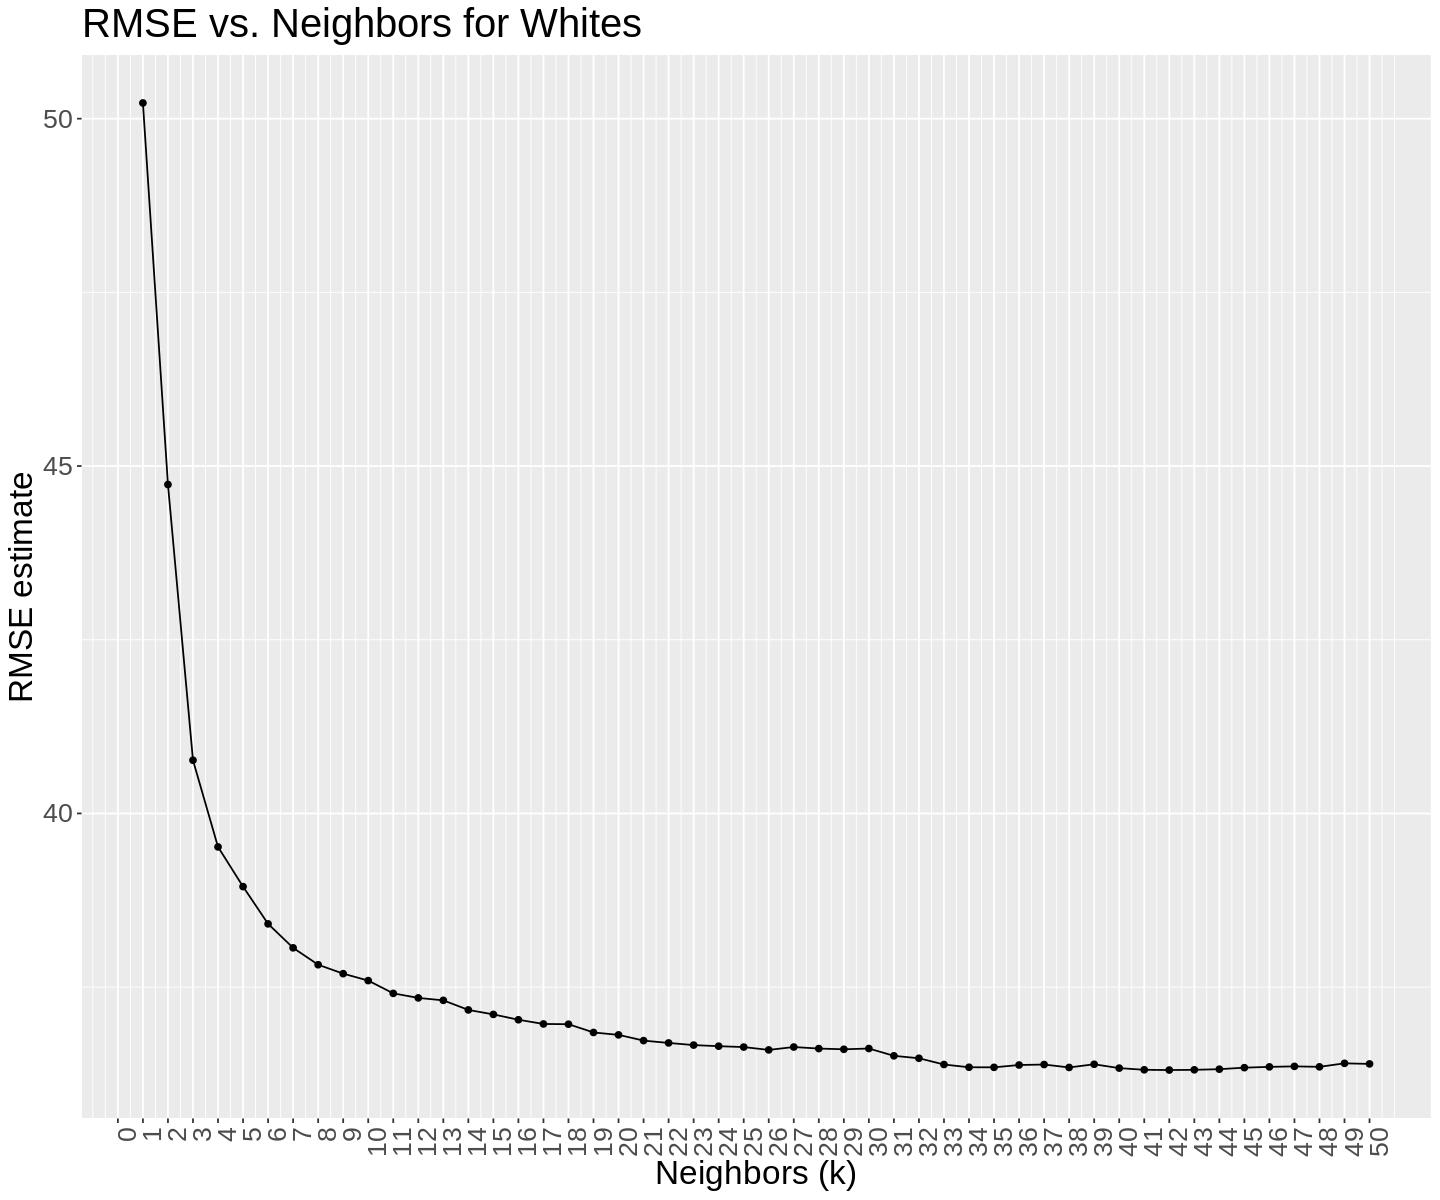

In [24]:
white_k_plot <- white_knn_metrics |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors (k)", y = "RMSE estimate", title = "RMSE vs. Neighbors for Whites") +
                scale_x_continuous(breaks = seq(0, 50, by = 1)) +
                theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20))

white_k_plot

In [25]:
asian_lin_recipe <- recipe(ViolentCrimesPerPop ~ racePctAsian, data = crime_training)

asian_lin_fit <- workflow() |>
                add_recipe(asian_lin_recipe) |>
                add_model(lin_spec) |>
                fit(data = crime_training)

asian_lin_fit

asian_lin_rmse <- asian_lin_fit |>
            predict(crime_training) |>
            bind_cols(crime_training) |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse")

asian_lin_rmse

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  racePctAsian  
      31.136         0.272  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,38.42634


In [26]:
asian_knn_recipe <- recipe(ViolentCrimesPerPop ~ racePctAsian, data = crime_training) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())

asian_knn_metrics <- workflow() |>
                add_recipe(asian_knn_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = vfold, grid = kvals) |>
                collect_metrics() |>
                filter(.metric == "rmse") |>
                select(neighbors, mean)

head(asian_knn_metrics)
tail(asian_knn_metrics)

neighbors,mean
<dbl>,<dbl>
1,50.91346
2,46.92701
3,44.34878
4,43.00647
5,41.72931
6,41.46062


neighbors,mean
<dbl>,<dbl>
45,38.63468
46,38.65805
47,38.64175
48,38.64475
49,38.61967
50,38.63887


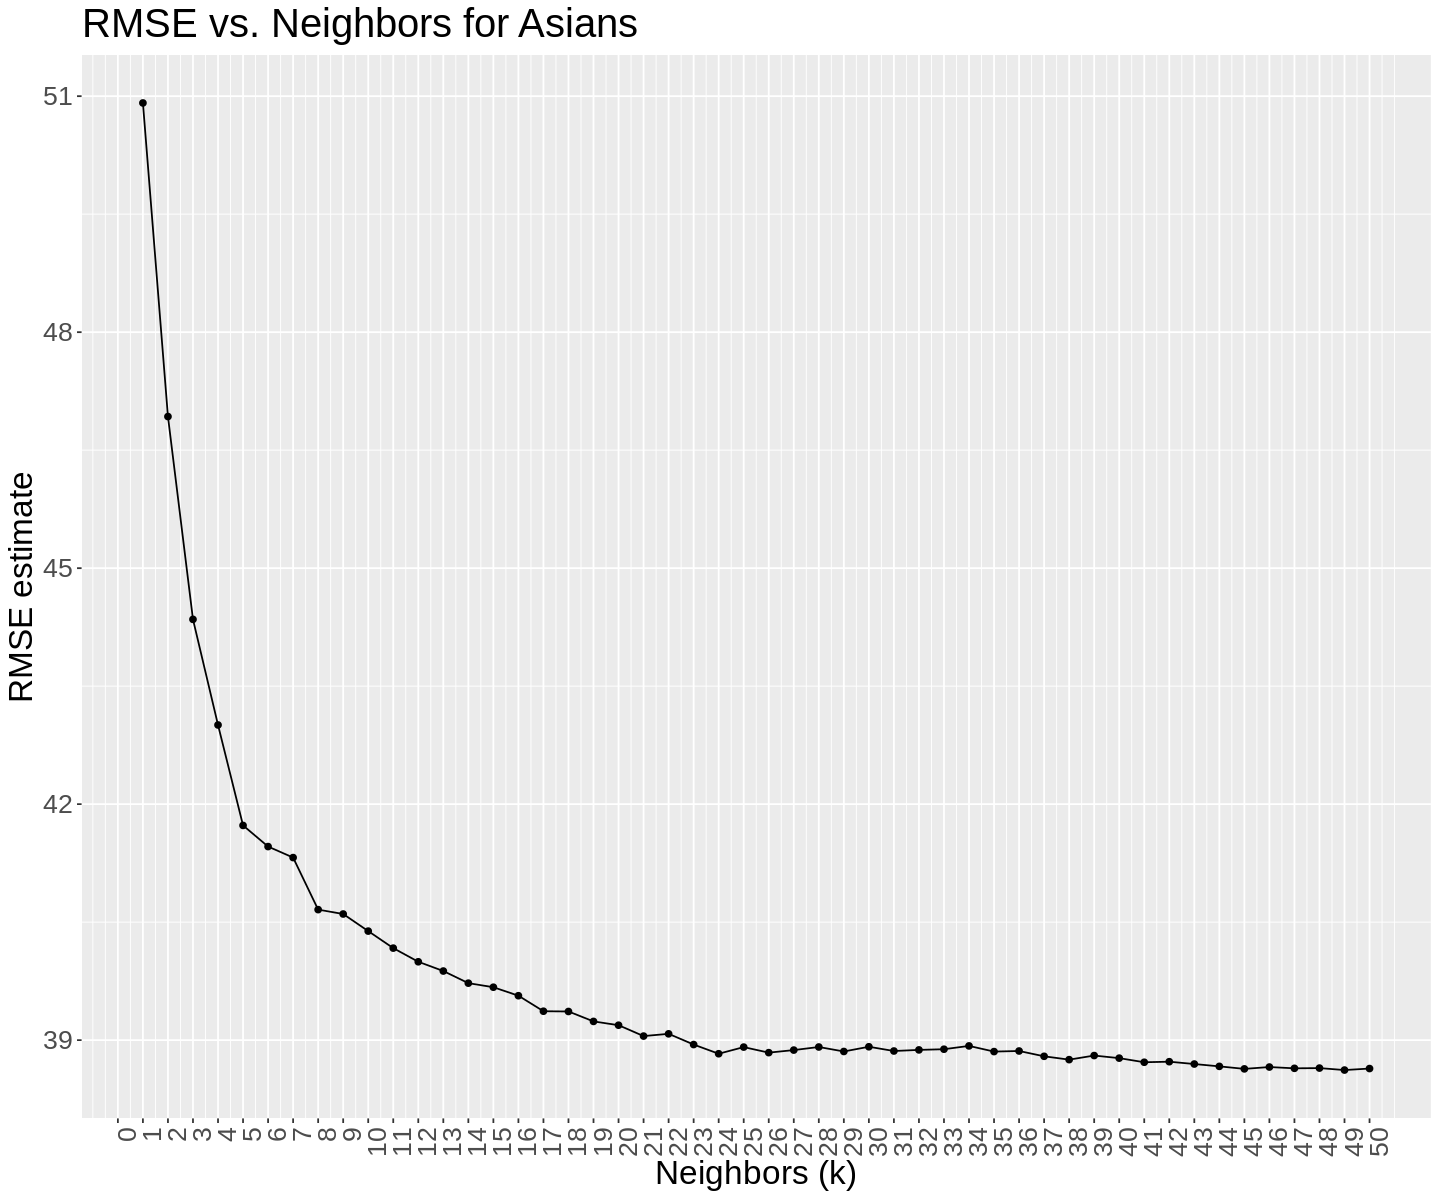

In [33]:
asian_k_plot <- asian_knn_metrics |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors (k)", y = "RMSE estimate", title = "RMSE vs. Neighbors for Asians") +
                scale_x_continuous(breaks = seq(0, 50, by = 1)) +
                theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20))

asian_k_plot

In [28]:
hisp_lin_recipe <- recipe(ViolentCrimesPerPop ~ racePctHisp, data = crime_training)

hisp_lin_fit <- workflow() |>
                add_recipe(hisp_lin_recipe) |>
                add_model(lin_spec) |>
                fit(data = crime_training)

hisp_lin_fit

hisp_lin_rmse <- hisp_lin_fit |>
            predict(crime_training) |>
            bind_cols(crime_training) |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse")

hisp_lin_rmse

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)  racePctHisp  
    28.6855       0.3821  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,38.01461


In [29]:
hisp_knn_recipe <- recipe(ViolentCrimesPerPop ~ racePctHisp, data = crime_training) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())

hisp_knn_metrics <- workflow() |>
                add_recipe(hisp_knn_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = vfold, grid = kvals) |>
                collect_metrics() |>
                filter(.metric == "rmse") |>
                select(neighbors, mean)

head(hisp_knn_metrics)
tail(hisp_knn_metrics)

neighbors,mean
<dbl>,<dbl>
1,51.38586
2,45.21021
3,42.58324
4,42.03987
5,41.13020
6,41.03944


neighbors,mean
<dbl>,<dbl>
45,38.10834
46,38.09116
47,38.10387
48,38.07092
49,38.06237
50,38.05296


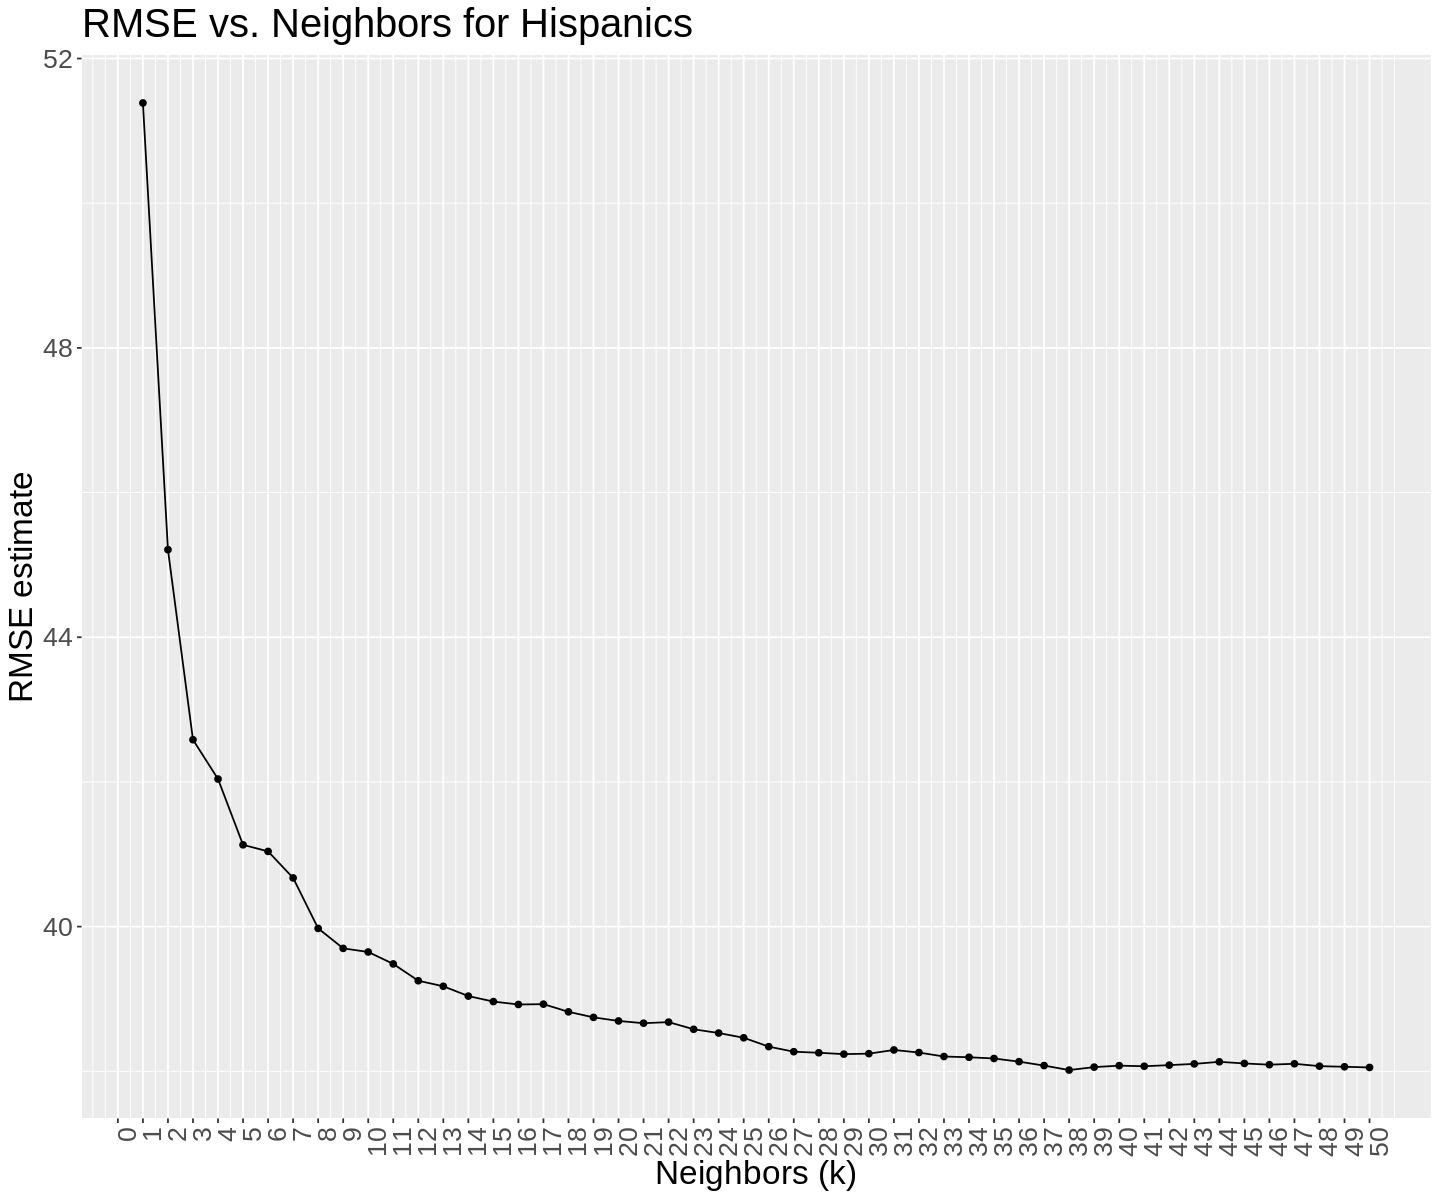

In [32]:
hisp_k_plot <- hisp_knn_metrics |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors (k)", y = "RMSE estimate", title = "RMSE vs. Neighbors for Hispanics") +
                scale_x_continuous(breaks = seq(0, 50, by = 1)) +
                theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20))

hisp_k_plot

EXPECTED OUTCOMES AND SIGNIFICANCE

Previous research has yielded a relationship between race and crime rate, where the white population is the most underrepresented among persons arrested for violent and non-violent crimes (Bonczar & Beck, 1997). Based on these findings, we can hypothesize that the ratio of violent to non-violent crime in predominantly white populations will be lower.

Through our findings, we hope to determine how much specific races are over or under represented for criminal involvement. This information is important as it links to the debate of whether or not there is overrepresentation in the justice and prison systems by certain races and the role of discrimination in such cases. If race can indeed predict the occurence of violent to non-violent crimes, it may only reinforce the dangers that stereotypes place on certain ethnic groups.

However, our question is merely predictive and not causal. We cannot say for certain whether race causes a higher incidence of violent crime compared to non-violent crime, or whether it is the only factor in a higher crime ratio. Further exploration could be conducted on determining if causal relationship exists, or perhaps on other demographics such as education or income and whether they can predict the crime ratio as well.

REFERENCES

Bonczar, T. P., & Beck, A. J. (1997, March 6). Lifetime likelihood of going to state or Federal Prison. Bureau of Justice Statistics. Retrieved October 28, 2022, from https://bjs.ojp.gov/library/publications/lifetime-likelihood-going-state-or-federal-prison 

Dua, D., & Graff, C. (2019). Communities and crime unnormalized data set. UCI Machine Learning Repository. Retrieved October 27, 2022, from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

Farrell, C. R., & Lee, B. A. (2016, December 26). No-majority communities: Racial diversity and change at the local level. Urban affairs review (Thousand Oaks, Calif.). Retrieved October 27, 2022, from https://pubmed.ncbi.nlm.nih.gov/31814691/

U.S. Census Bureau. U.S. Department of Commerce. (2022, October 13). Retrieved October 27, 2022, from https://www.commerce.gov/bureaus-and-offices/census

Weidner, R. R., & Schultz, J. (2019, August 13). Examining the relationship between U.S. incarceration rates and population health at the county level. SSM - population health. Retrieved October 27, 2022, from https://pubmed.ncbi.nlm.nih.gov/31485477/